# Project Report

## Introduction

This project evaluates the relationship between the fines recorded by the municipal speed enforcement and the road accidents that happened in the city of Konstanz.The major objective of this project is to carefully examine and assess if the imposition of penalties by the municipal speed enforcement may have a substantial impact on the number of accidents that occur in Constance. It will be possible to determine from the analysis of the research's data and the conclusions published in a full report if the implementation of penalties can assist reduce the number of accidents or if it has the opposite impact and increases them.

## Data Source 1

Metadata URL: https://mobilithek.info/offers/-2507179451879954949

Data URL: https://offenedaten-konstanz.de/sites/default/files/Blitzerdaten%20Jahresstatistik%202019.csv

Data Type: CSV

These annual statistics allow for the retrieval of fines issued by the city of Konstanz's municipal speed enforcement system throughout the course of a 12 months.

## Data Source 2

Metadata URL: https://mobilithek.info/offers/-197304001474165362
        
Data URL: https://offenedaten-konstanz.de/sites/default/files/Unfallatlas_Konstanz_Gesamt_2016-2019.csv
        
Data Type: CSV
    
Road traffic accidents are accidents in which people are killed or injured or property is damaged as a result of driving on public roads and squares.ccidents involving injuries to people are included in the accident atlas. It does not display accidents that solely cause property damage. Based on reports from the police stations, the accident atlas provides information gathered from statistics of traffic accidents.

In [486]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import numpy as np 
import seaborn as sns
from pandas.plotting import scatter_matrix

In [487]:
enforcement = pd.read_sql_table('SpeedEnforcement', 'sqlite:///konstanz.db')
accidents = pd.read_sql_table('AccidentData', 'sqlite:///konstanz.db')

In [488]:
enforcement

,index,Location,Month,Measured_vehicle,Violate,Valid_violations,Warnings,Fines,Max_speed,Revenue
0,0,7,1,743.993,1.852,1.554,1.524,30,95.0,30290
1,1,7,2,818.973,1.729,1.362,1.300,62,104.0,34200
2,2,7,3,1.129.972,3.501,2.836,2.767,69,97.0,56660
3,3,7,4,1.147.216,4.359,3.451,3.359,92,108.0,72265
4,4,7,5,1.101.258,3.889,3.197,3.106,91,100.0,65430
...,...,...,...,...,...,...,...,...,...,...
112,112,1,9,259.323,1.705,1.350,1.317,33,99.0,27545
113,113,1,10,270.563,1.673,1.401,1.369,32,103.0,28215
114,114,1,11,226.018,1.123,955.000,923.000,32,94.0,19775
115,115,1,12,0,0.000,0.000,0.000,0,NaN,0


In [489]:
accidents

,index,AccidentId,Year,Month,Weekday,Hour,Category,CollisionType,AccidentType,LightningCondition,IsBicycle,IsPassengerCar,IsFoot,IsMotorcyle,IsLorry,IsOther
0,0,a2af2811f3abcfbc205865c6b86d580c24fe1a02,2016,1,2,13,3,5,3,0.0,0,1,0,0,0.0,0
1,1,9fe6052f828a285a26555a58d7813144bd3ca367,2016,1,6,11,1,8,1,0.0,0,1,0,1,0.0,0
2,2,39a42d55f83a7fdb56035ccb8a8832e187f38849,2016,1,7,17,3,2,2,0.0,0,1,0,0,0.0,0
3,3,f2c109a3e567f4b210b5198bb49be120839f0730,2016,1,3,17,3,6,7,0.0,0,1,1,0,0.0,0
4,4,2780e4e8e7582b2c764d7f875f341619cda0b3d4,2016,1,4,11,3,0,1,0.0,0,0,0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1256,a17f92a7ae0bcabfe6708ef4fe0a25c03d965cc6,2019,12,2,11,3,5,3,0.0,1,1,0,0,0.0,0
1257,1257,f12097a9494d650bb16f44fdade13c82a82611ef,2019,12,4,12,3,5,2,0.0,0,1,0,1,0.0,0
1258,1258,b7b02918d3869d0df569d1079b328d81ce4b91be,2019,12,2,14,3,2,7,0.0,0,0,0,1,1.0,0
1259,1259,415f0a4f3c7d15341fdeca875f539fa1e99fe60a,2019,12,6,8,2,0,1,0.0,1,0,0,0,0.0,0


In [490]:
## excluding all years other than 2019, as enforcement data frame is based on that year.
accidents = accidents.loc[accidents["Year"] == 2019 ]

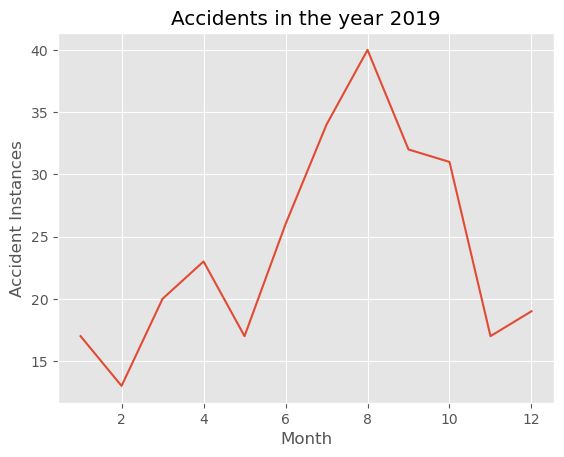

In [491]:
df = accidents.groupby('Month').size()

df.plot()
plt.title("Accidents in the year 2019")
plt.xlabel("Month")
plt.ylabel("Accident Instances")
plt.show()

This figure shows Monthly accidents combined in the year 2019

In [492]:
acc= list(accidents.groupby('Month').size())
months= list(accidents.groupby('Month').size().keys())

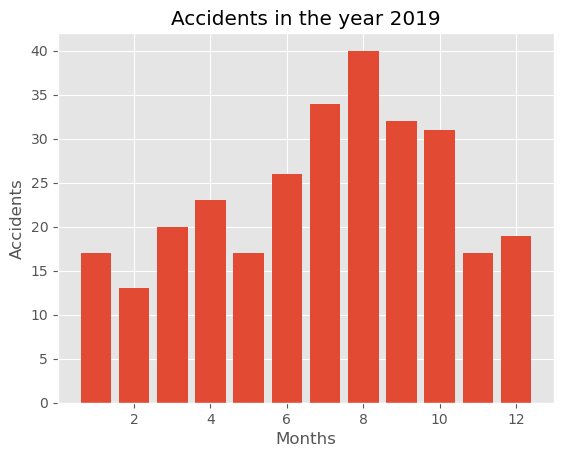

In [493]:
##style.use('ggplot')
plt.bar(months,acc)
plt.title("Accidents in the year 2019")
plt.xlabel('Months')
plt.ylabel('Accidents')
plt.show()

A Bargraph showing the same data of accidents happening monthly in the year 2019

In [494]:
ser = accidents.groupby("Month").count()

bike = accidents.filter(items=["Month","IsBicycle"])
bike = list(bike.loc[bike["IsBicycle"] == 1 ].groupby('Month').size())
car = accidents.filter(items=["Month","IsPassengerCar"])
car = list(car.loc[car["IsPassengerCar"] == 1 ].groupby('Month').size())
foot = accidents.filter(items=["Month","IsFoot"])
foot = list(foot.loc[foot["IsFoot"] == 1 ].groupby('Month').size())
foot.append(0)
foot.append(0)
foot.insert(0,0)
foot.insert(5,0)
motorcycle = accidents.filter(items=["Month","IsMotorcyle"])
motorcycle = list(motorcycle.loc[motorcycle["IsMotorcyle"] == 1 ].groupby('Month').size())
other = accidents.filter(items=["Month","IsOther"])
other = list(other.loc[other["IsOther"] == 1 ].groupby('Month').size())


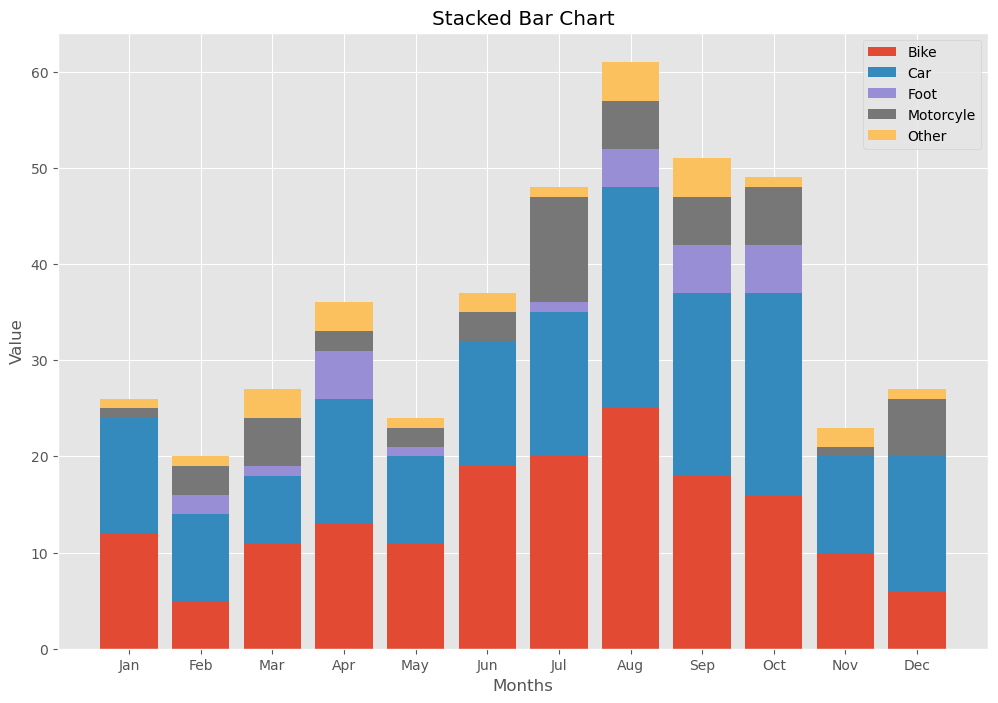

In [495]:
x_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y_labels = ['Bike', 'Car', 'Foot', 'Motorcyle', 'Other']
data = [bike,car,foot,motorcycle,other]

# Set the width of each bar
bar_width = 0.8

# Set the positions of the bars on the x-axis
bar_positions = np.arange(len(x_labels))

# Create the figure and axes with a larger size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each bar
for i in range(len(y_labels)):
    ax.bar(bar_positions, data[i], bar_width, label=y_labels[i], bottom=np.sum(data[:i], axis=0))

# Set labels, title, and legend
ax.set_xlabel('Months')
ax.set_ylabel('Value')
ax.set_title('Stacked Bar Chart')
ax.set_xticks(bar_positions)
ax.set_xticklabels(x_labels)
ax.legend()

# Display the chart
plt.show()

This stacked bar chart shows the \with what vehicle accidents occured yearlong

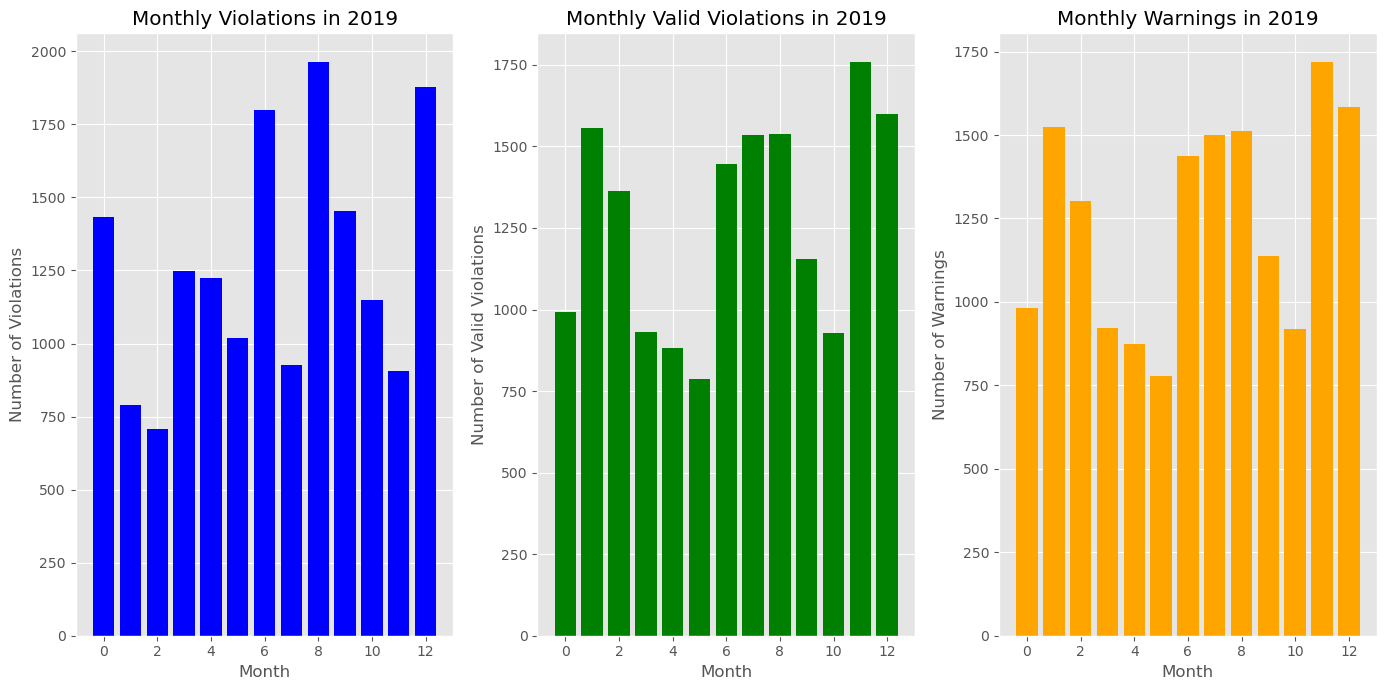

In [496]:
df = enforcement[['Month', 'Violate', 'Valid_violations', 'Warnings']]

# Group the data by month and calculate the total violations, valid violations, and warnings
df_grouped = df.groupby('Month').sum().reset_index()

# Set up the plot
plt.figure(figsize=(14, 7))

# Plot the monthly violations
plt.subplot(1, 3, 1)
plt.bar(df_grouped['Month'], df_grouped['Violate'], color='blue')
plt.title('Monthly Violations in 2019')
plt.xlabel('Month')
plt.ylabel('Number of Violations')

# Plot the monthly valid violations
plt.subplot(1, 3, 2)
plt.bar(df_grouped['Month'], df_grouped['Valid_violations'], color='green')
plt.title('Monthly Valid Violations in 2019')
plt.xlabel('Month')
plt.ylabel('Number of Valid Violations')

# Plot the monthly warnings
plt.subplot(1, 3, 3)
plt.bar(df_grouped['Month'], df_grouped['Warnings'], color='orange')
plt.title('Monthly Warnings in 2019')
plt.xlabel('Month')
plt.ylabel('Number of Warnings')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

These sub-bar plots are shown to compare the violations that have been occured, which of them were valid and if there were given and warnings

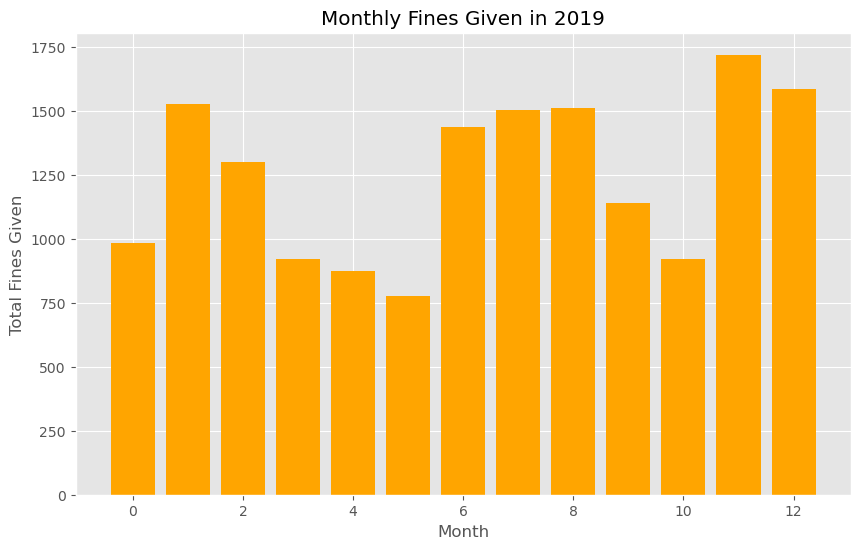

In [497]:
df = enforcement[['Month', 'Warnings']]

# Group the data by month and calculate the total fines given
df_grouped = df.groupby('Month').sum().reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['Month'], df_grouped['Warnings'], color='orange')

# Set the chart title and labels
plt.title('Monthly Fines Given in 2019')
plt.xlabel('Month')
plt.ylabel('Total Fines Given')

# Display the plot
plt.show()

Monthly fines given in the year 2019

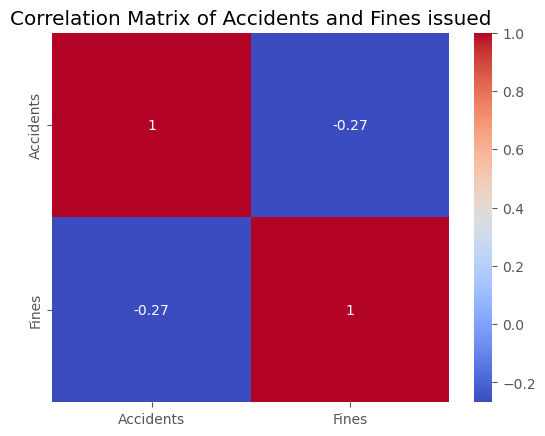

In [505]:
fines = enforcement[['Month', 'Fines']]
acc = accidents[['Month', 'index']]

dfNew = pd.DataFrame()
dfNew['Accidents'] =acc.groupby('Month').sum().reset_index()["index"]
dfNew['Fines'] = fines.groupby('Month').sum().reset_index()['Fines']


correlation_matrix = dfNew.corr()  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Accidents and Fines issued')
plt.show()

There is no discernible correlation between accidents and fines.

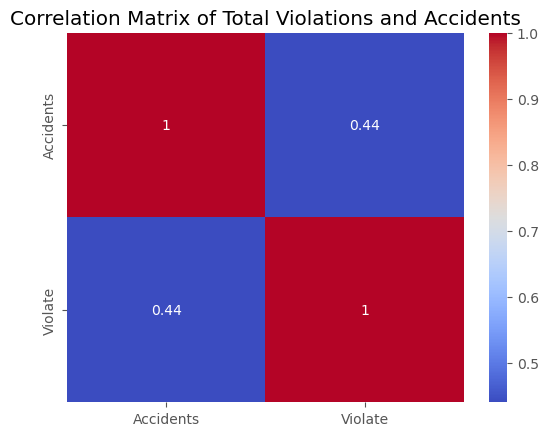

In [506]:
fines = enforcement[['Month', 'Violate']]
acc = accidents[['Month', 'index']]

dfNew = pd.DataFrame()
dfNew['Accidents'] =acc.groupby('Month').sum().reset_index()["index"]
dfNew['Violate'] = fines.groupby('Month').sum().reset_index()['Violate']


correlation_matrix = dfNew.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Total Violations and Accidents')
plt.show()

The correlation between Accidents and total Violations cant be observed either 

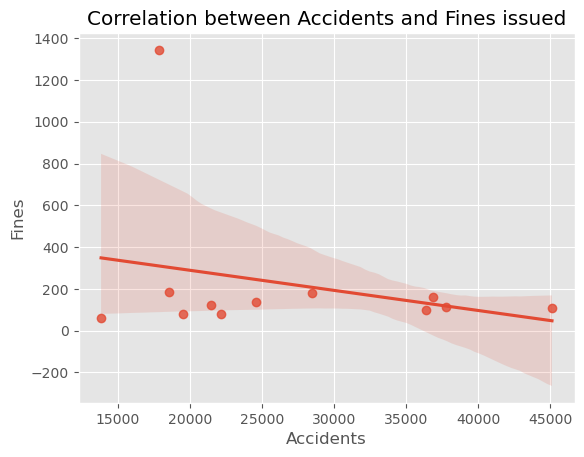

In [499]:
sns.regplot(x=dfNew['Accidents'], y=dfNew['Fines'])
plt.xlabel('Accidents')
plt.ylabel('Fines')
plt.title('Correlation between Accidents and Fines issued')
plt.show()

As for the question if the fines issued affect any accidents, There doesnt seem to be any correlancy with the fines issued and accidents 

## Conclusion

There is no apparent correlation between the fines issued and accidents, as fines can be imposed for various reasons unrelated to accidents. It is important to consider that fines are not exclusively issued in response to accidents, but can also be a result of violations such as traffic infractions, parking violations, or noncompliance with regulations. Thus, the issuance of fines does not appear to have a direct impact on the occurrence or prevention of accidents. Other factors, such as driver behavior, road conditions, and enforcement of traffic laws, are likely to play more significant roles in accident rates.